# **Result visualization**

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [14]:
RESULTS_ROOT = "../01_simulation/04_results/"
SEEDS = ['42', '1234', '1867', '613', '1001']

In [15]:
p_data = pd.DataFrame()
#READING DATA:
for s in SEEDS:
    filename = RESULTS_ROOT+f'poccup_by_vehs_{s}.csv'
    pf = pd.read_csv(filename)
    pf["seed"] = [s]*len(pf)
    p_data = pd.concat([p_data, pf])
    
p_data["time"] = p_data["time"] - 4*24*60*60
p_data["time"] = p_data["time"].astype(int)
p_data["time_of_day"] = (p_data["time"] - (p_data["time"] // (24*60*60))*24*60*60) / (24*60*60) #converting to 0.0-1.0 and removing periodicity

In [16]:
p_data

,veh_id,parking_id,time,occupancy,seed,time_of_day
0,h3098c1:0,pa-27,10,0.923077,42,0.000116
1,h3098c1:0,pa-71,10,0.842105,42,0.000116
2,h3098c1:0,pa27,10,0.769231,42,0.000116
3,h3098c1:0,pa-27,11,0.923077,42,0.000127
4,h3098c1:0,pa-71,11,0.842105,42,0.000127
...,...,...,...,...,...,...
3128768,h798c1:0,pa-outside2,432000,0.000000,1001,0.000000
3128769,h798c1:0,pa11,432000,0.750000,1001,0.000000
3128770,h3101c1:0,pa-11,432000,0.428571,1001,0.000000
3128771,h3101c1:0,pa-outside2,432000,0.000000,1001,0.000000


In [17]:
parkings = p_data["parking_id"].unique()

## Values by parking lots

In [18]:
p_data_by_parking = {}
for p in parkings:
    p_filt = p_data[p_data["parking_id"] == p]
    p_filt = p_filt.groupby("time_of_day")["occupancy"].mean()
    p_data_by_parking[p] = p_filt    

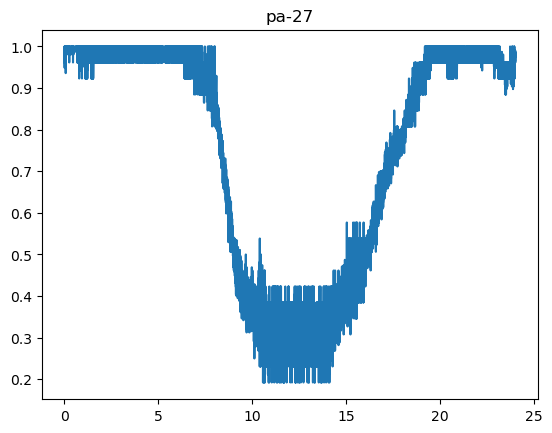

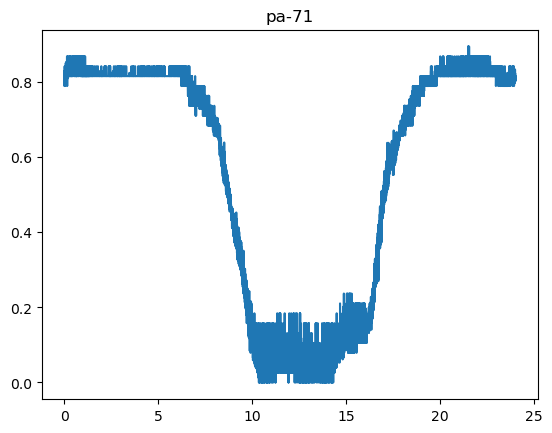

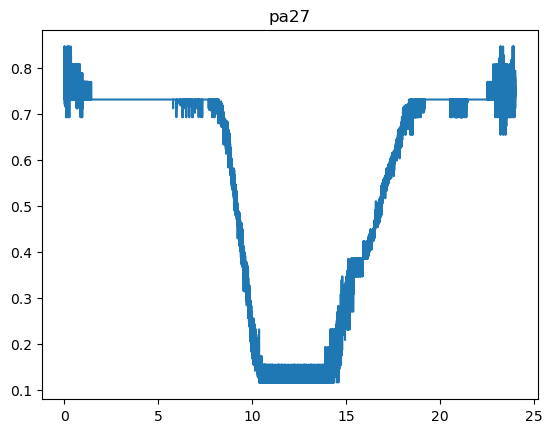

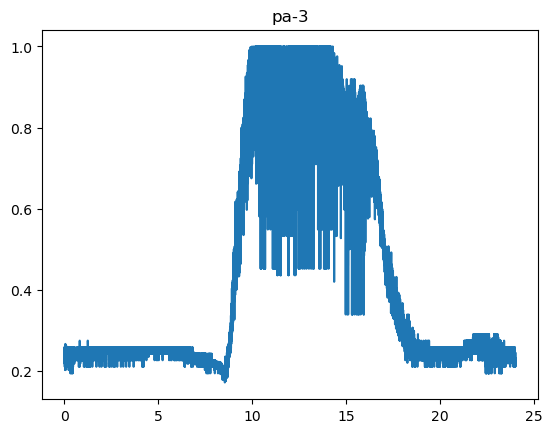

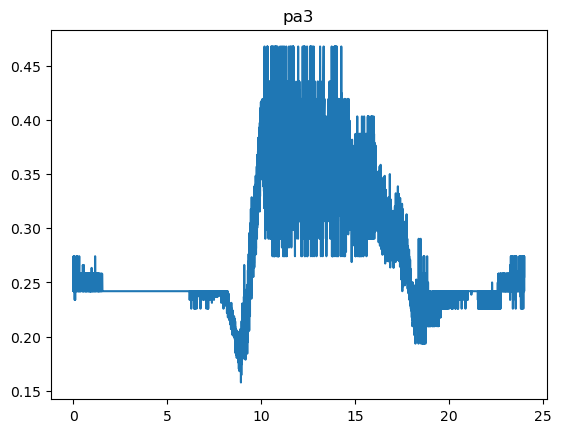

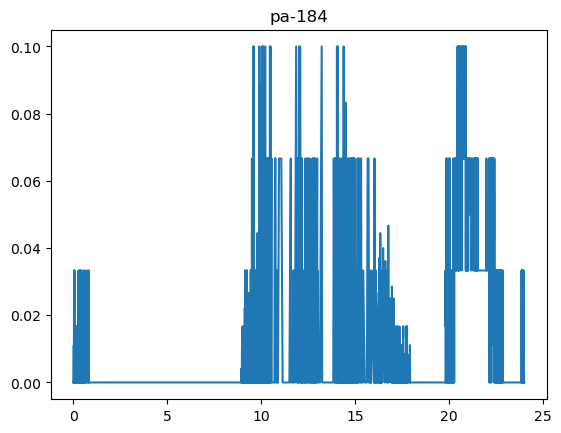

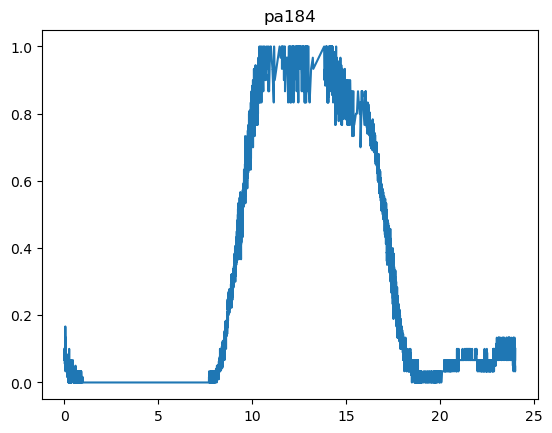

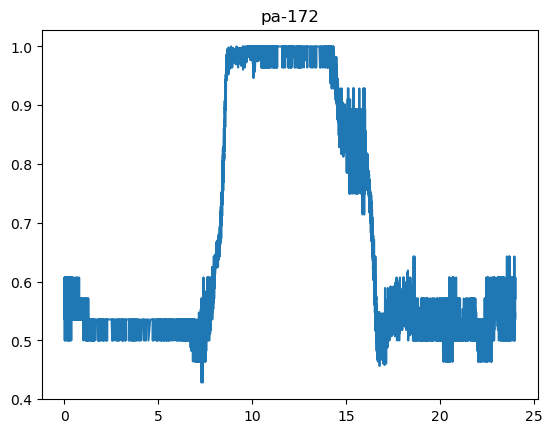

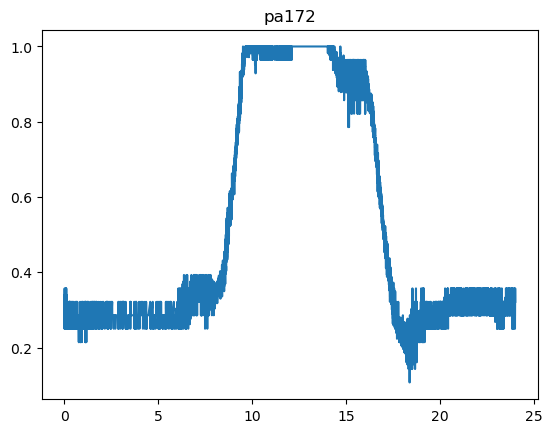

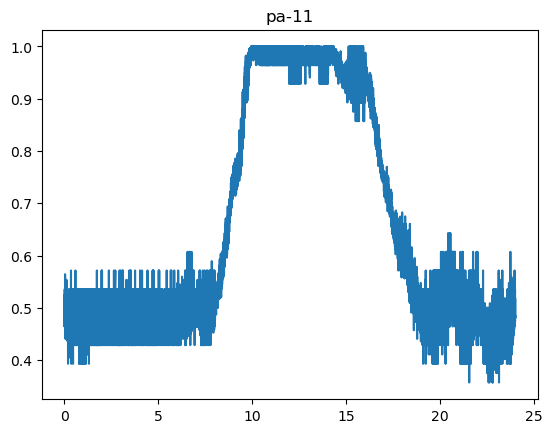

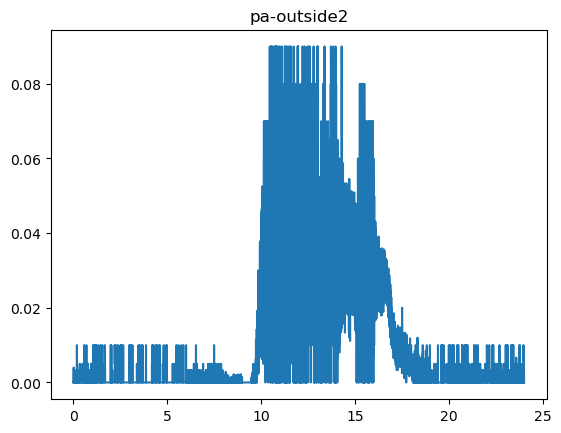

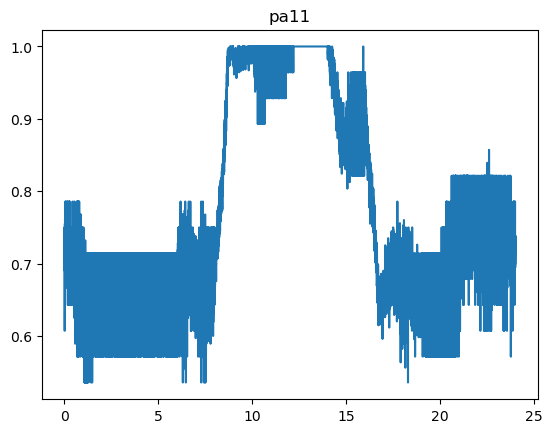

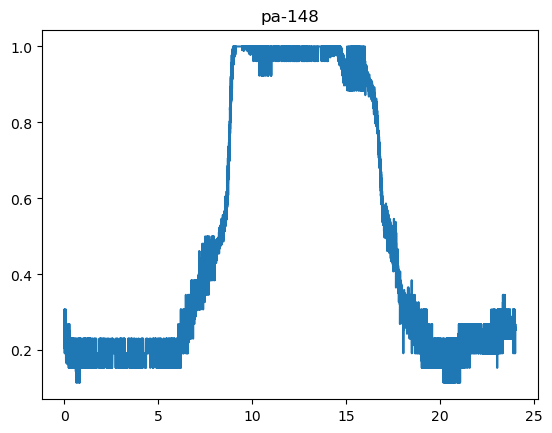

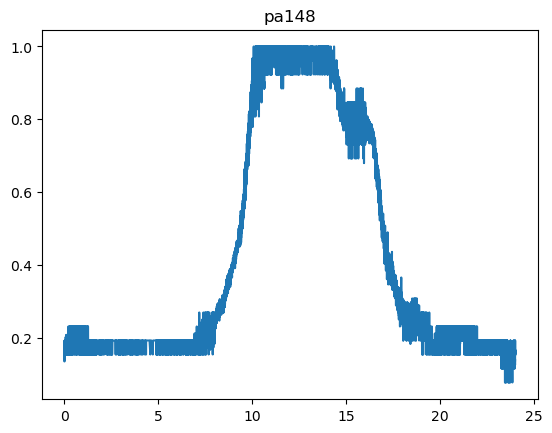

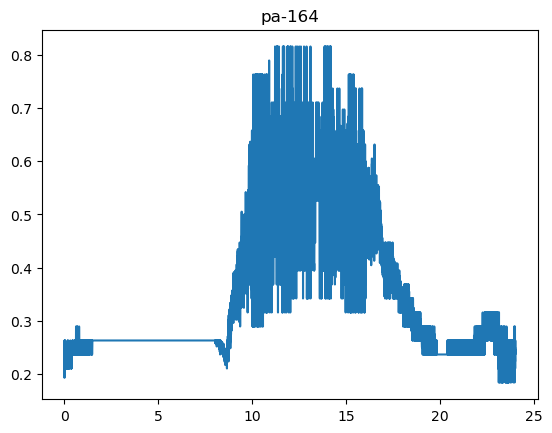

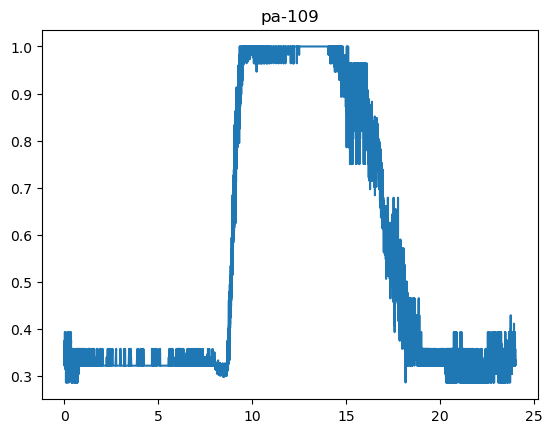

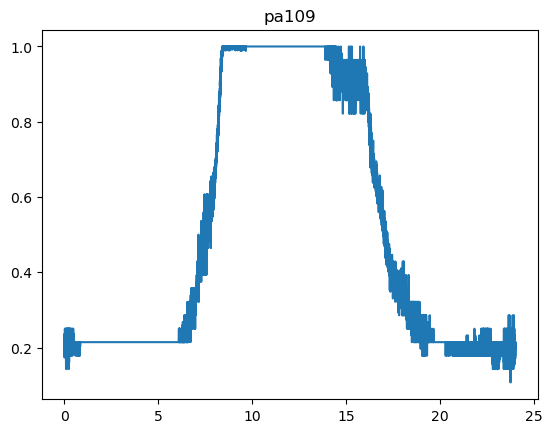

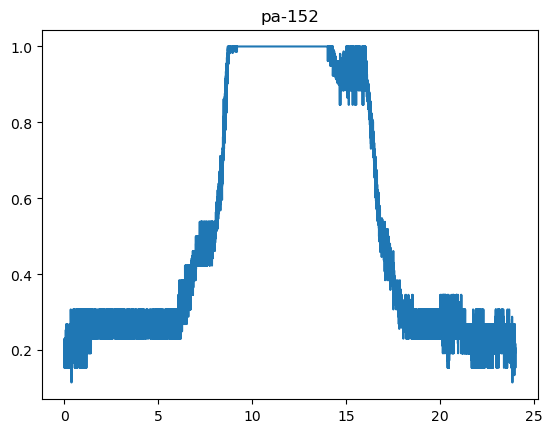

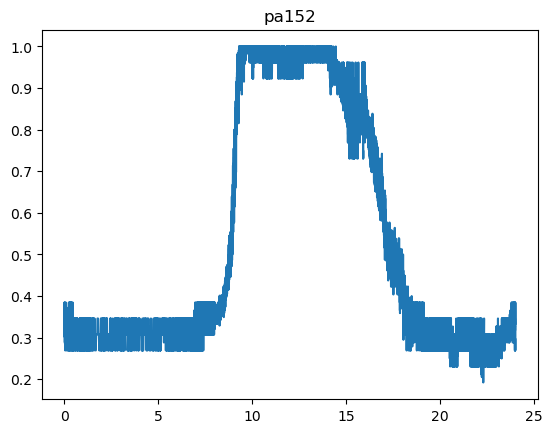

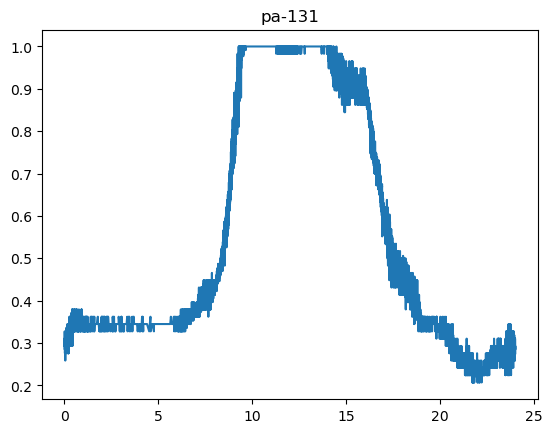

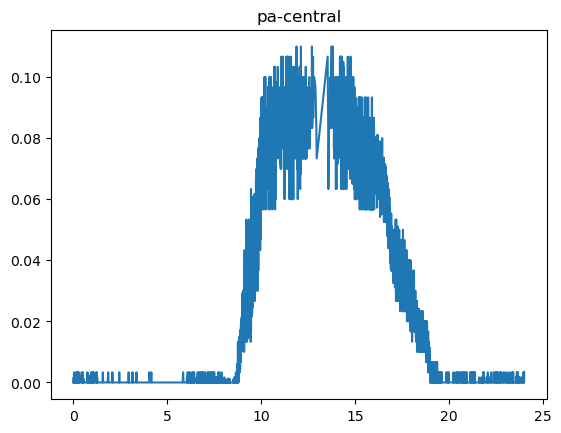

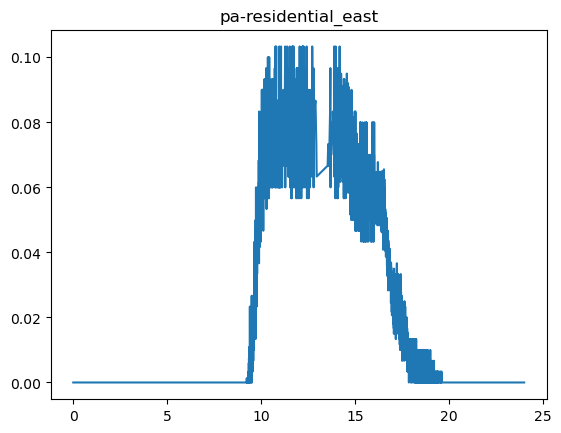

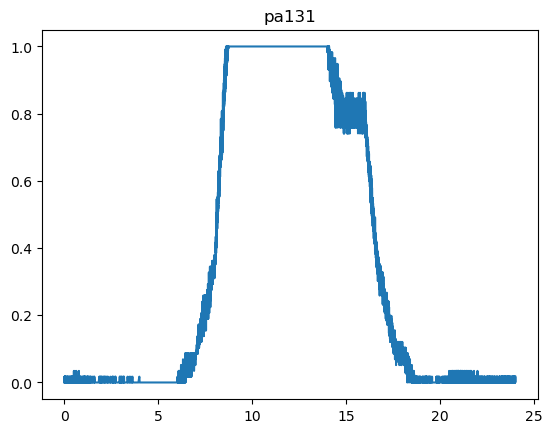

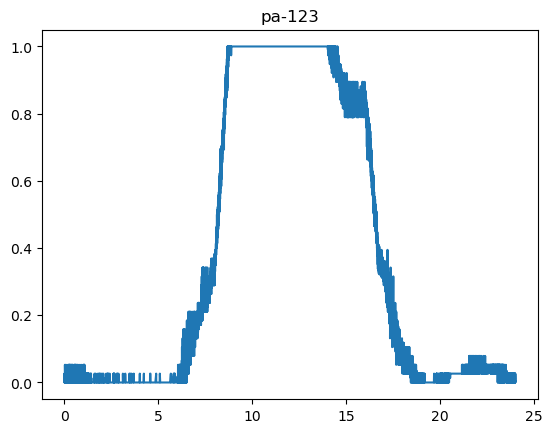

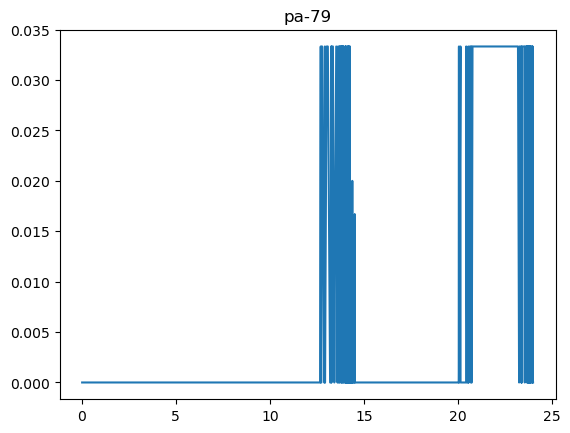

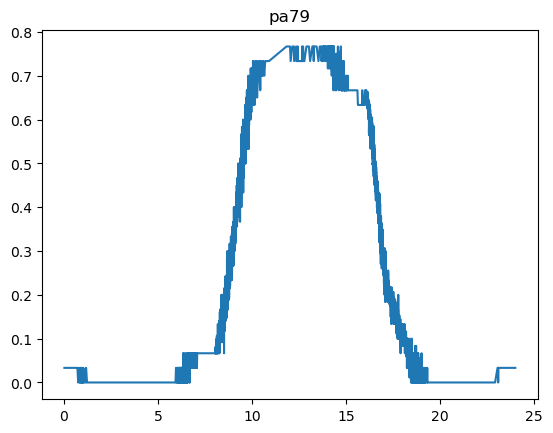

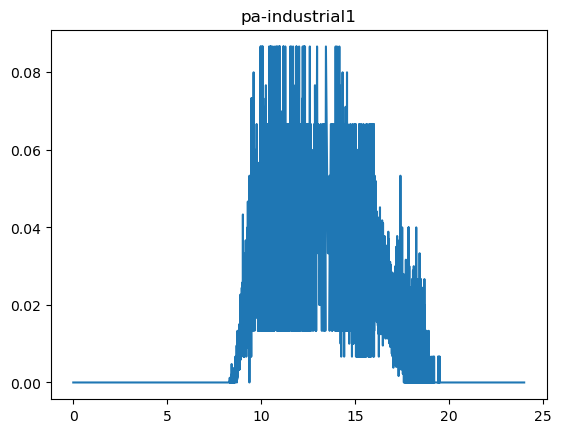

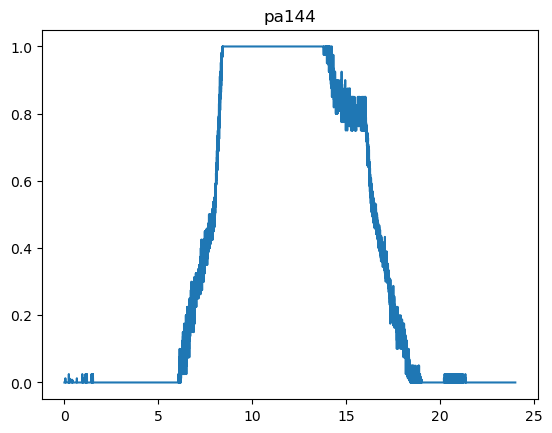

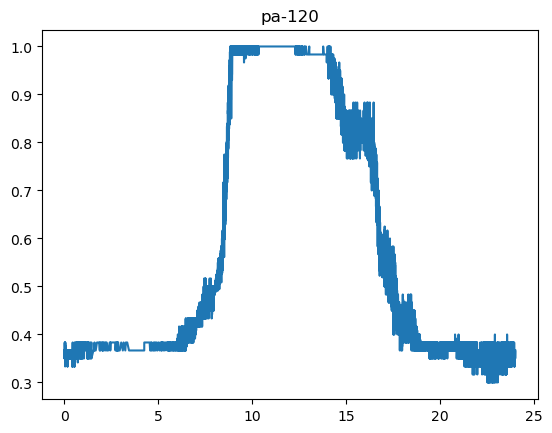

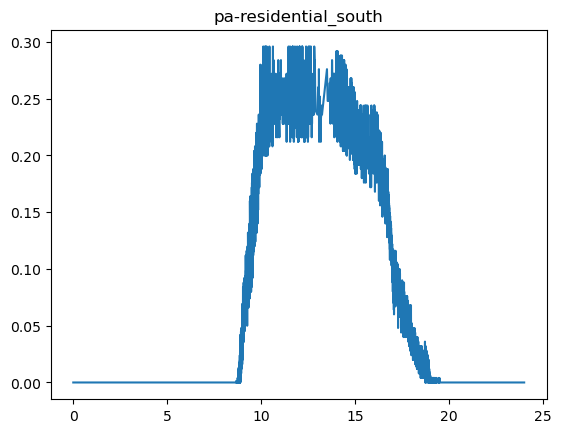

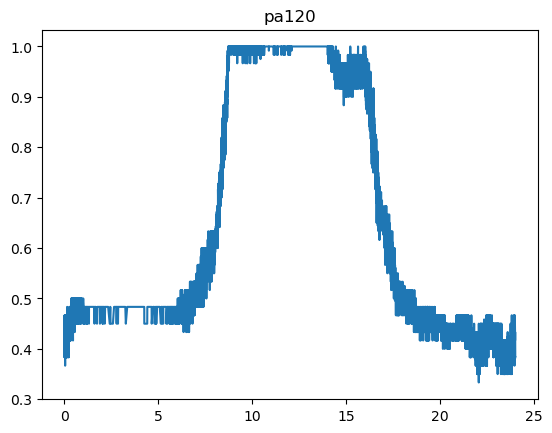

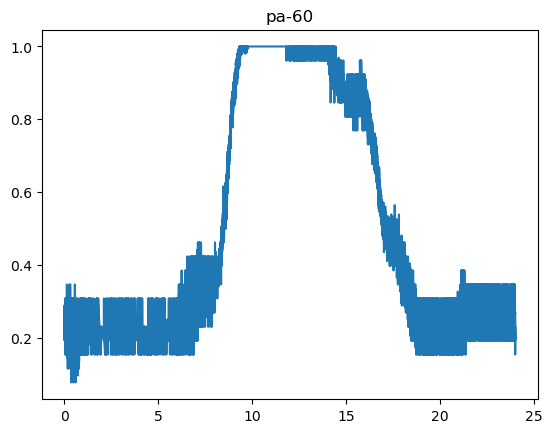

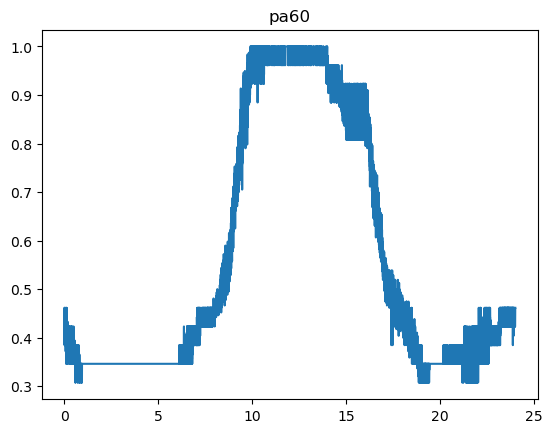

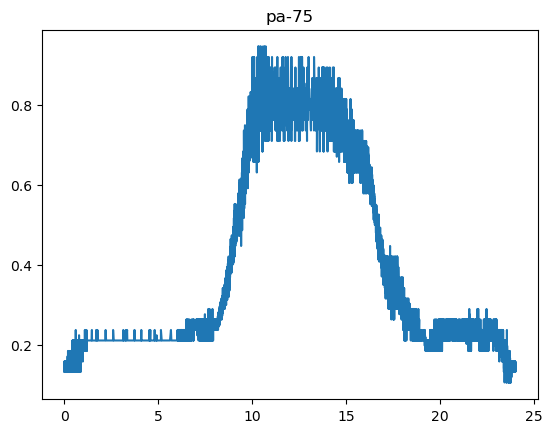

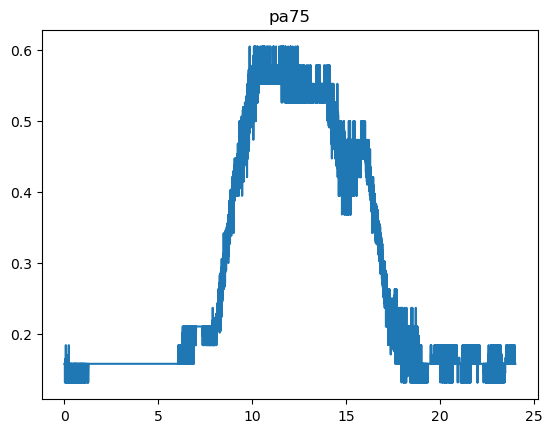

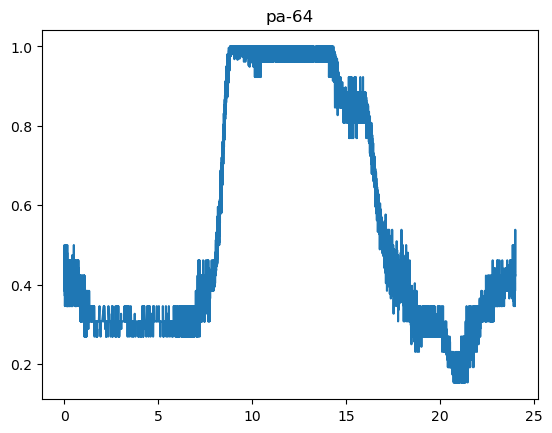

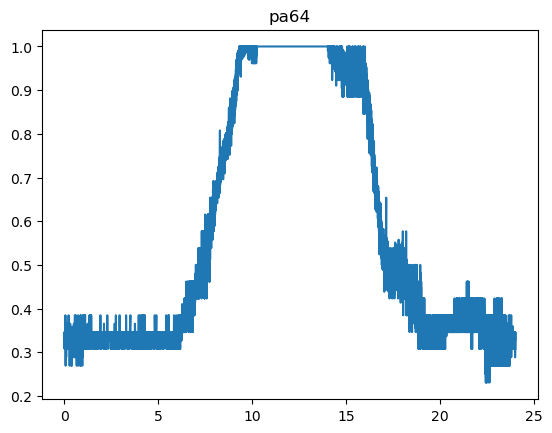

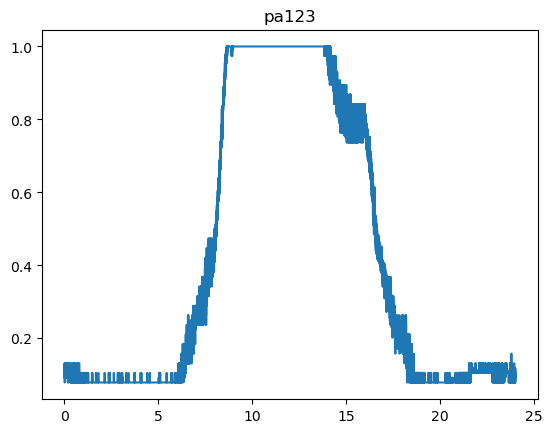

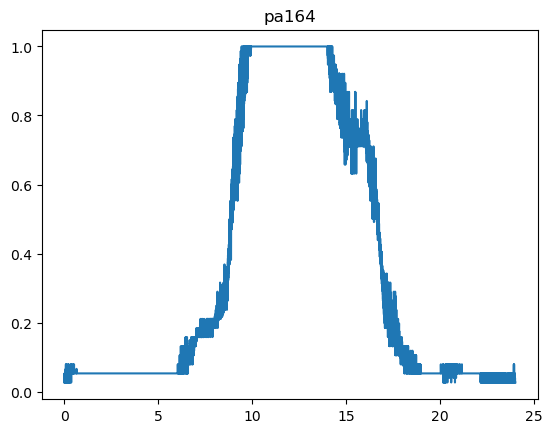

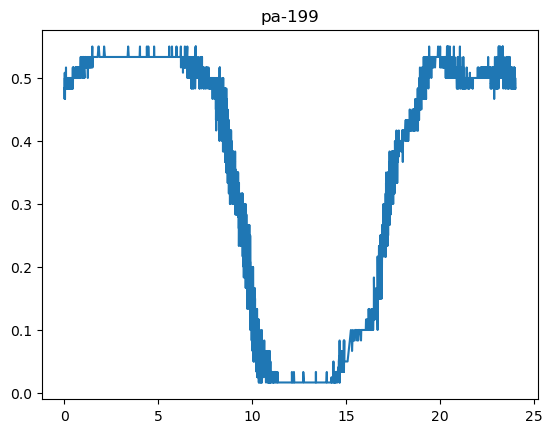

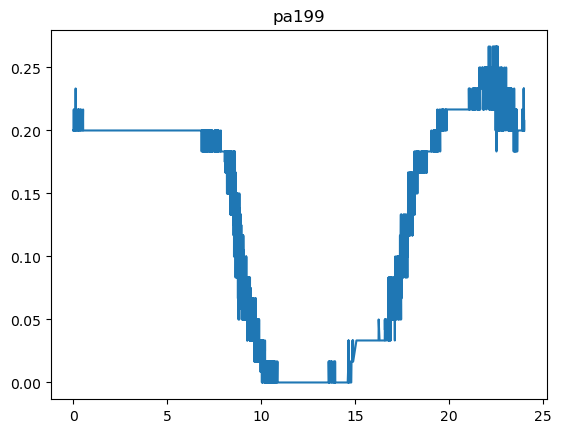

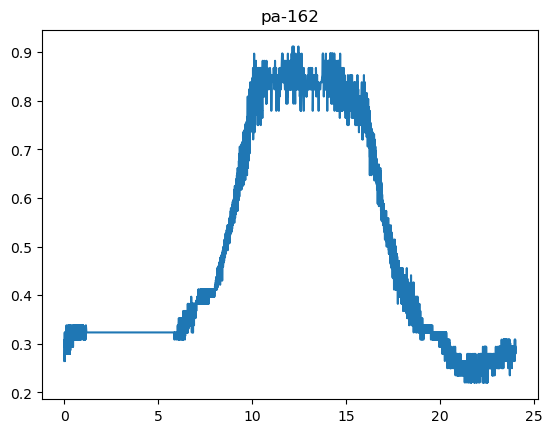

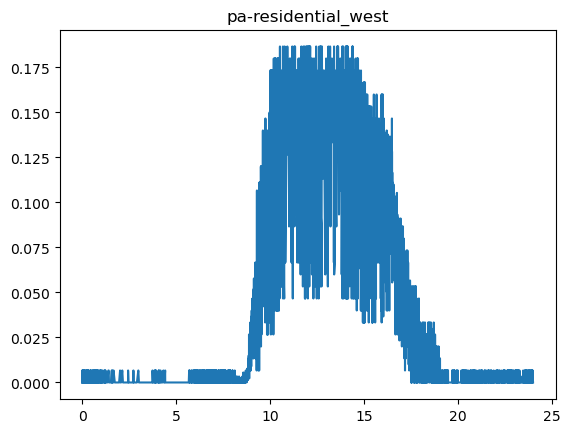

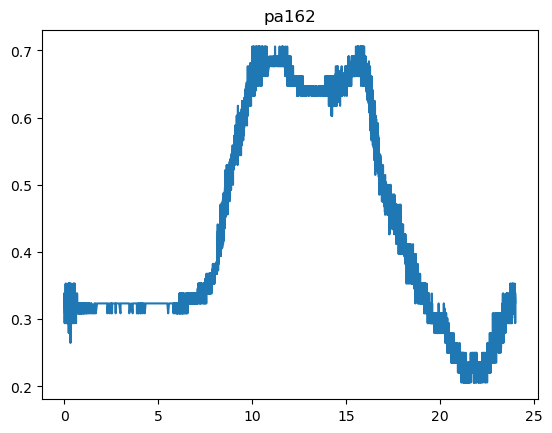

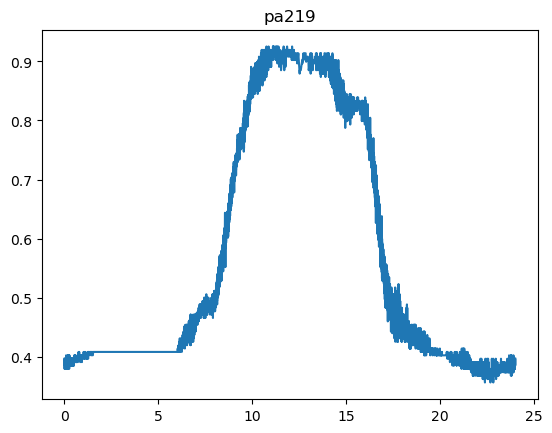

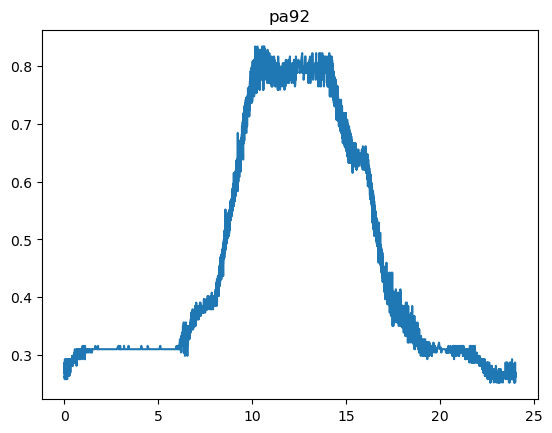

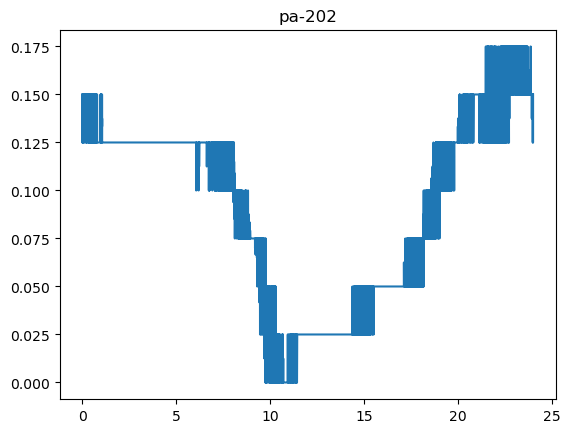

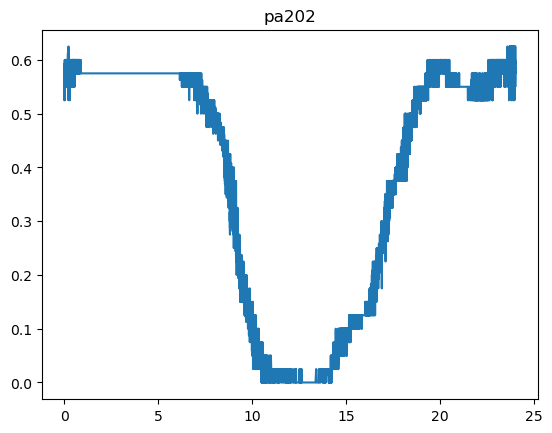

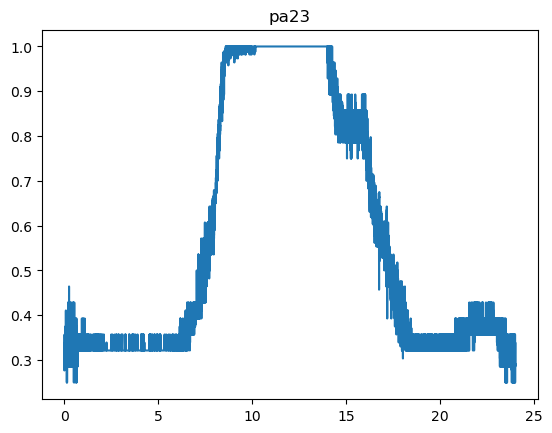

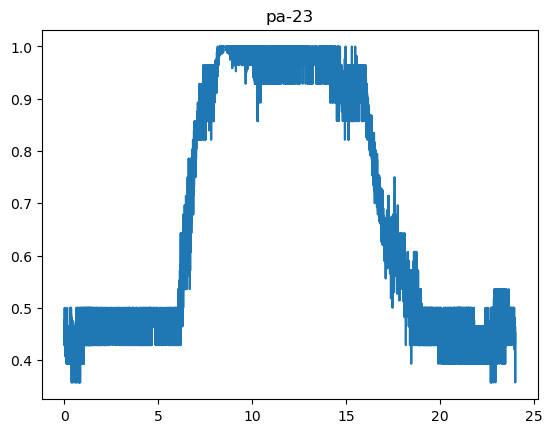

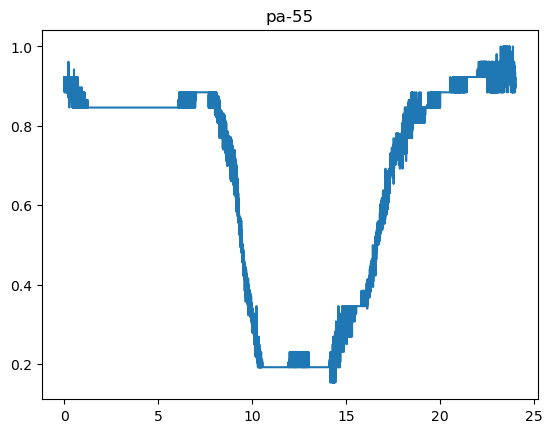

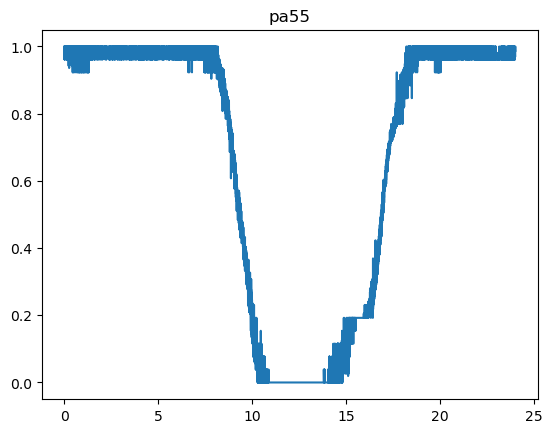

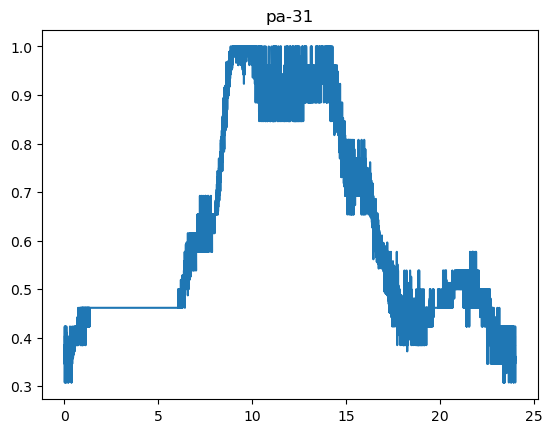

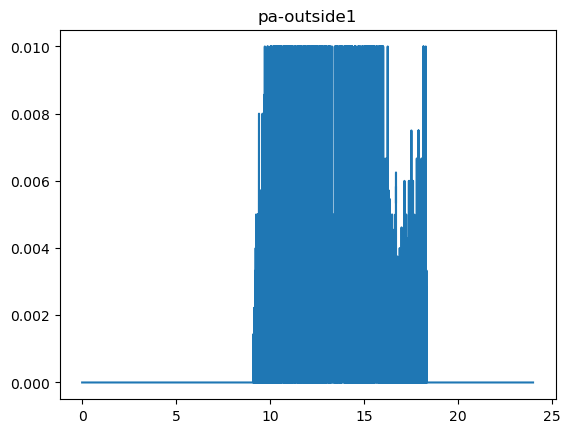

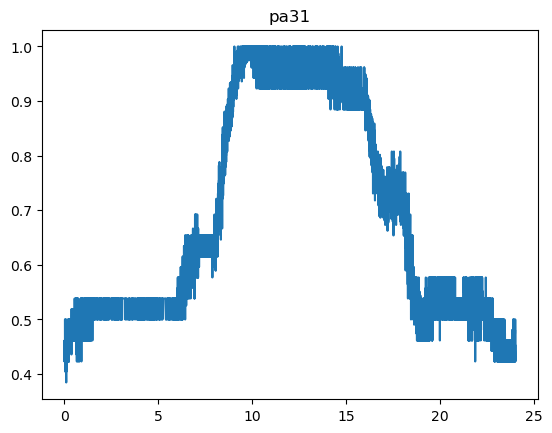

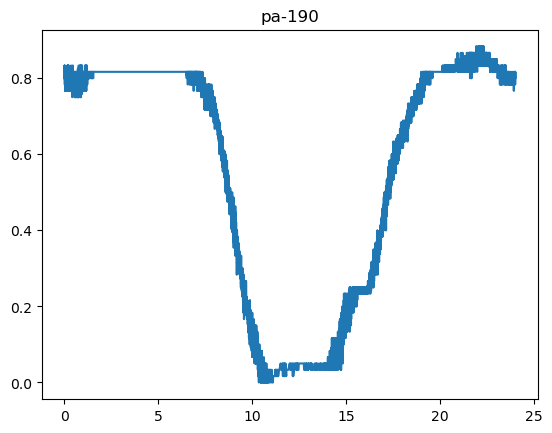

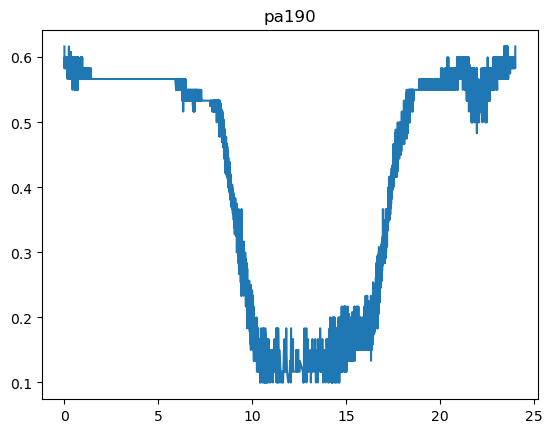

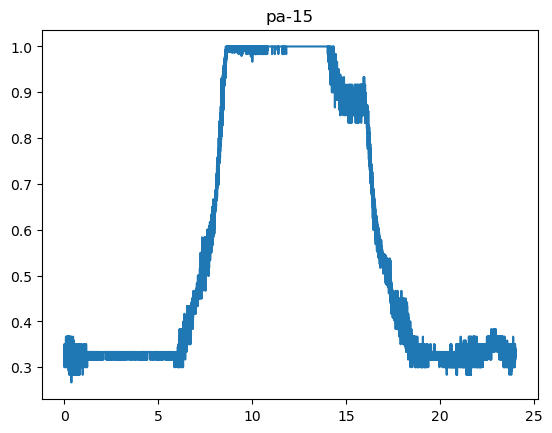

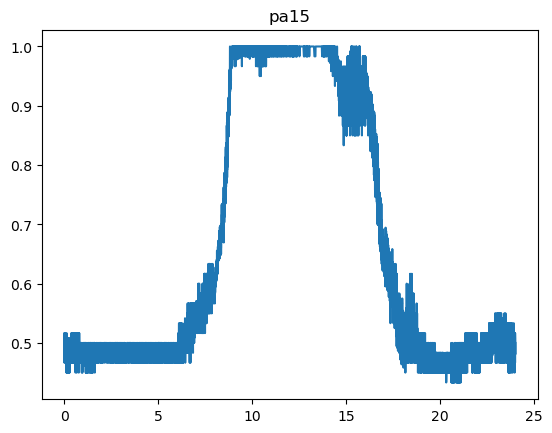

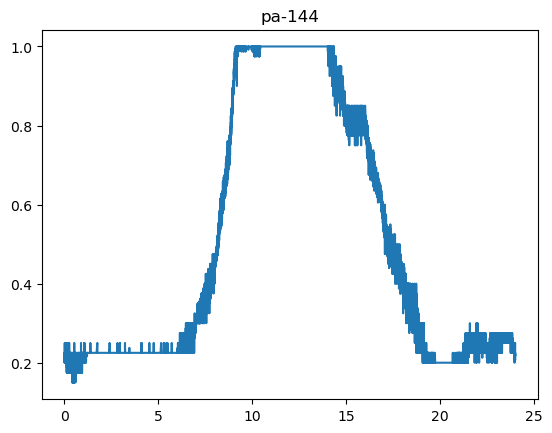

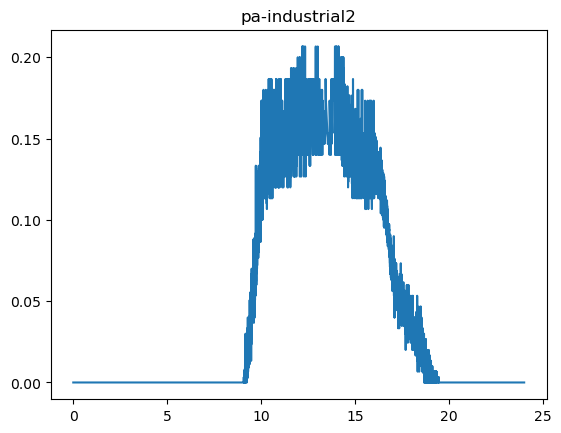

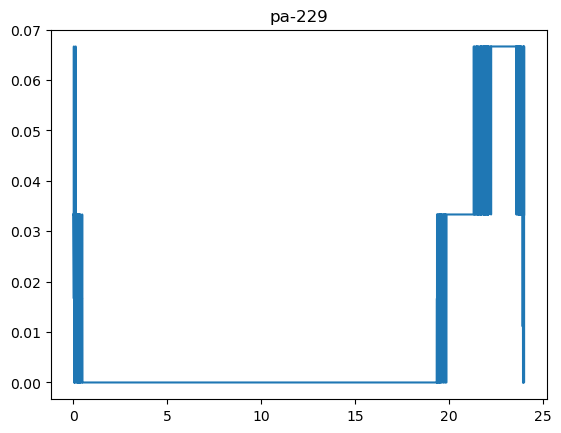

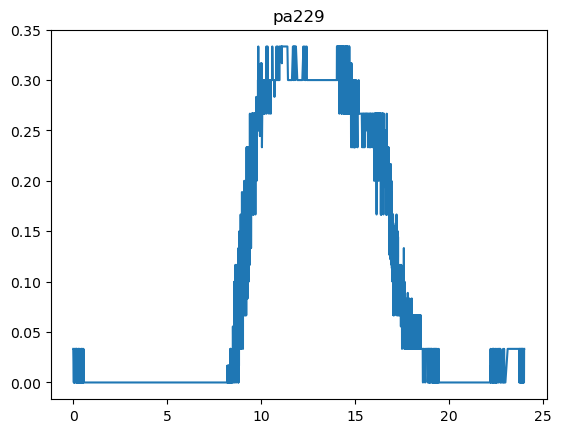

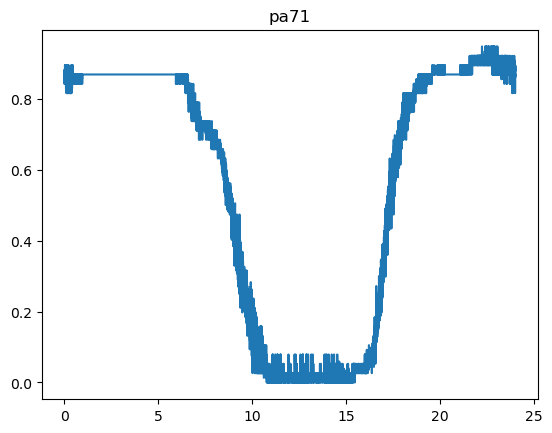

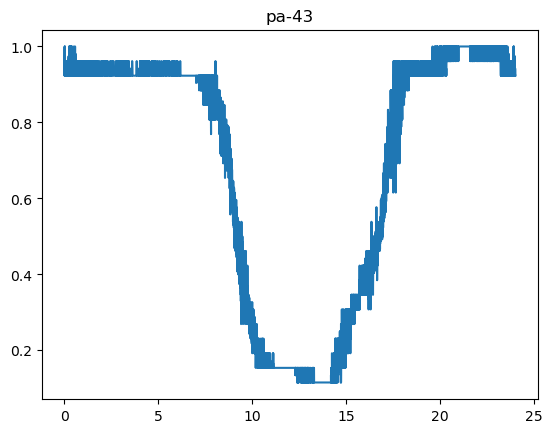

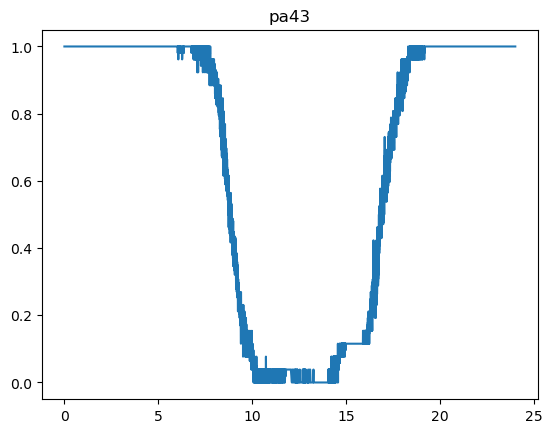

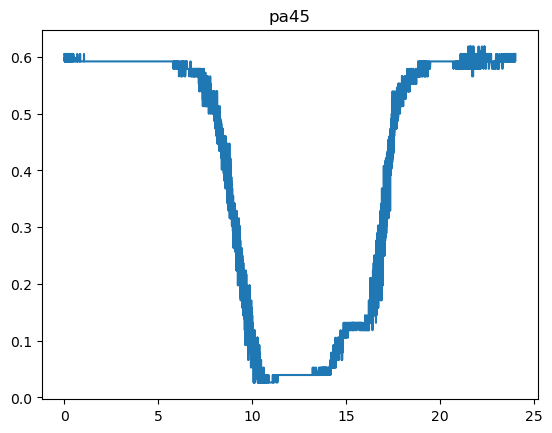

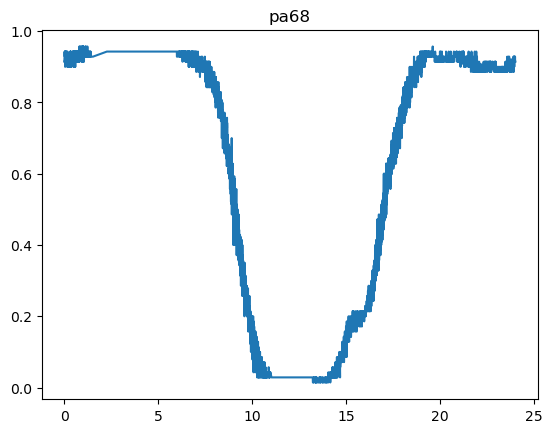

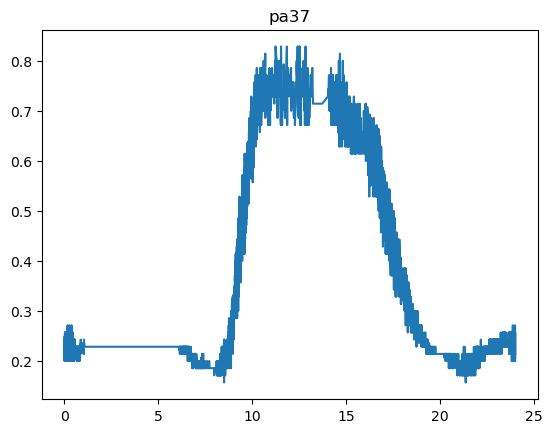

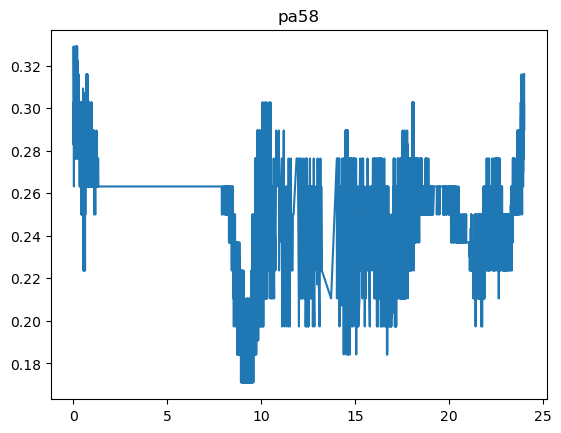

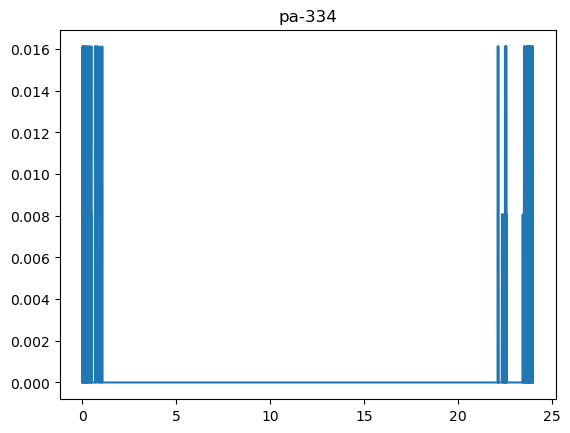

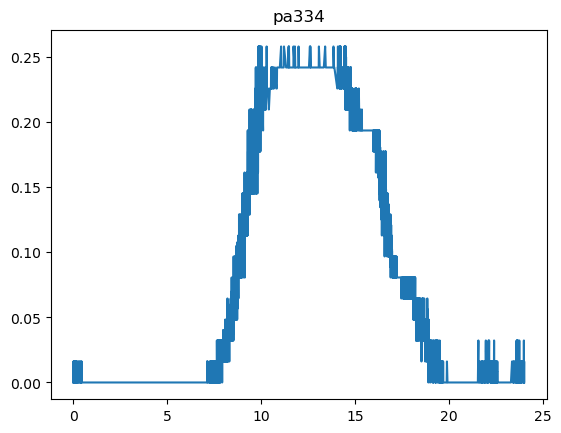

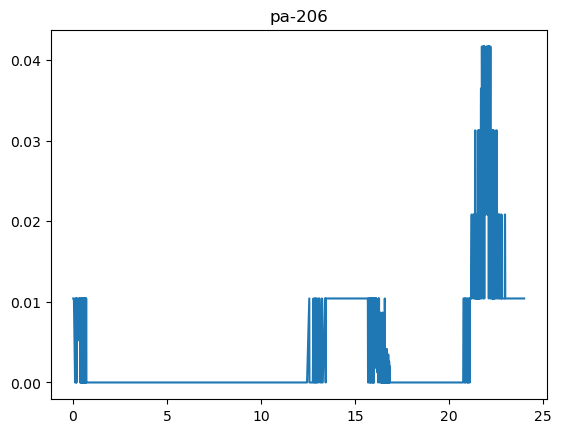

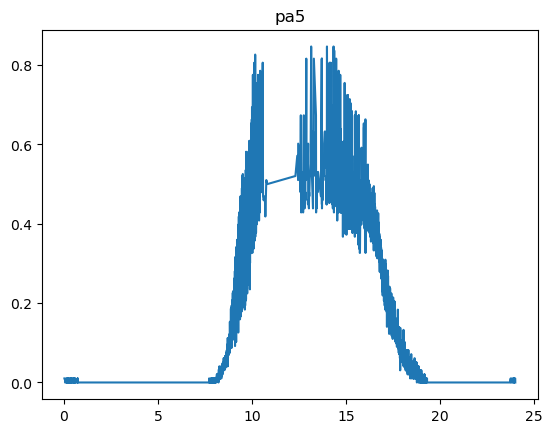

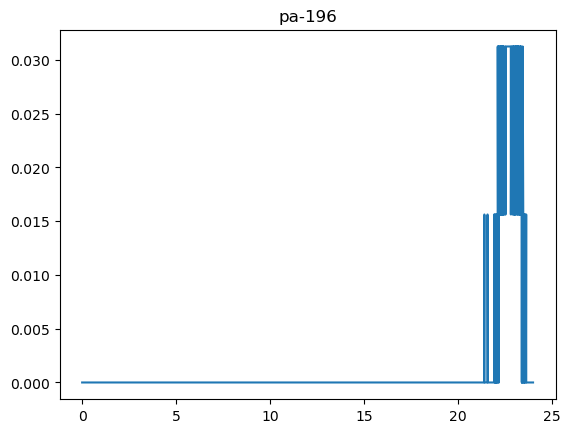

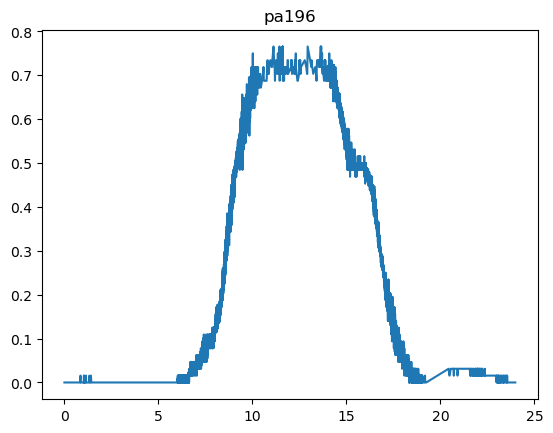

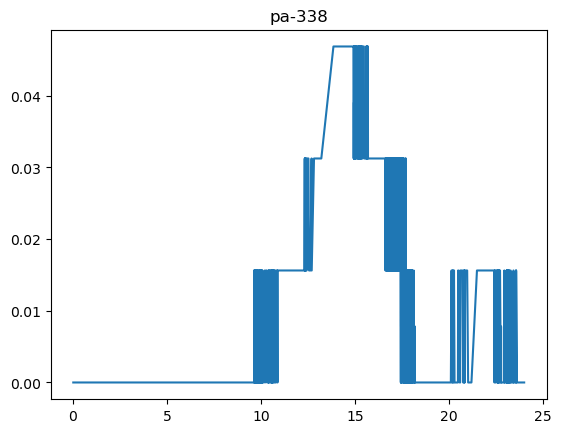

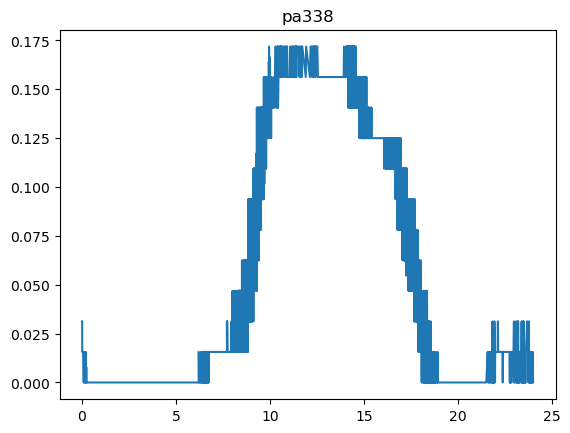

In [7]:
for p in parkings:
    plt.plot(p_data_by_parking[p].index*24, p_data_by_parking[p].values)
    plt.title(p)
    plt.show()

## Results by vehicles

In [19]:
p_data["veh_id"].unique()[500:600]

array(['carIn241:4', 'h3234c1:0', 'carIn451:4', 'h2649c1:0', 'h2557c2:0',
       'carIn551:4', 'randUni897:4', 'carIn67:4', 'randUni312:4',
       'carIn922:4', 'carIn622:4', 'h3369c1:0', 'h3406c2:0', 'carIn383:4',
       'h22c1:0', 'randUni65:4', 'h3484c1:0', 'h3390c1:0', 'randUni349:4',
       'h2544c1:0', 'h3319c1:0', 'carIn22:4', 'h482c1:0', 'h3120c1:0',
       'h2453c1:0', 'carIn330:4', 'carIn786:4', 'randUni651:4',
       'randUni996:4', 'h2115c1:0', 'h3401c2:0', 'carIn92:4',
       'carIn901:4', 'h2253c1:0', 'carIn581:4', 'carIn46:4', 'carIn294:4',
       'carIn72:4', 'carIn141:4', 'carIn95:4', 'carIn127:4', 'h3405c2:0',
       'carIn346:4', 'h3429c1:0', 'h3408c1:0', 'carIn90:4', 'carIn423:4',
       'h3293c1:0', 'carIn175:4', 'carIn56:4', 'carIn708:4', 'carIn25:4',
       'h3159c1:0', 'randUni476:4', 'randUni364:4', 'carIn337:4',
       'h3088c1:0', 'carIn106:4', 'h3425c1:0', 'h143c1:0', 'carIn758:4',
       'carIn60:4', 'carIn641:4', 'carIn687:4', 'h3323c1:0', 'carIn409:4',
  

In [45]:
#VEH_ID = "h3408c1:0"
#VEH_ID = "h482c1:0"
#VEH_ID = "h3120c1:0"
#VEH_ID = "h3271c2:0"
#VEH_ID = "carIn901:4"
VEH_ID = "carIn106:4"

In [46]:
p_vehs = p_data[p_data["veh_id"] == VEH_ID]

In [47]:
p_vehs

,veh_id,parking_id,time,occupancy,seed,time_of_day
72285,carIn106:4,pa-196,27810,0.000000,42,0.321875
72286,carIn106:4,pa196,27810,0.093750,42,0.321875
72297,carIn106:4,pa-196,27811,0.000000,42,0.321887
72298,carIn106:4,pa196,27811,0.093750,42,0.321887
72305,carIn106:4,pa-196,27812,0.000000,42,0.321898
...,...,...,...,...,...,...
532235,carIn106:4,pa196,65469,0.015625,1001,0.757743
532249,carIn106:4,pa-196,65470,0.000000,1001,0.757755
532250,carIn106:4,pa196,65470,0.015625,1001,0.757755
532262,carIn106:4,pa-196,65471,0.000000,1001,0.757766


In [48]:
p_veh_by_parking = {}
for p in p_vehs["parking_id"].unique():
    p_filt = p_vehs[p_vehs["parking_id"] == p]
    p_filt = p_filt.groupby("time_of_day")["occupancy"].mean()
    p_veh_by_parking[p] = p_filt

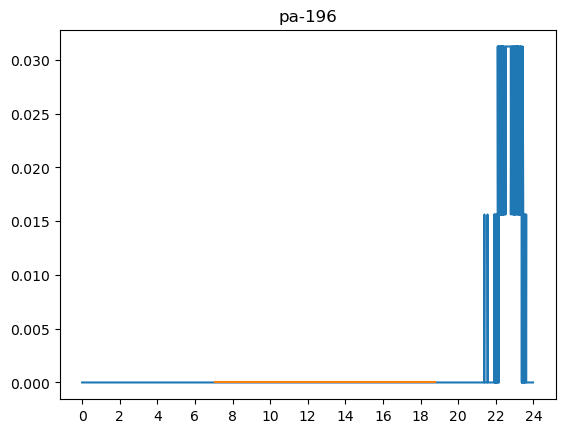

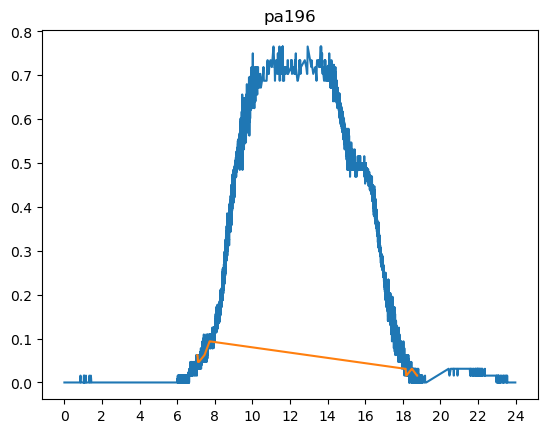

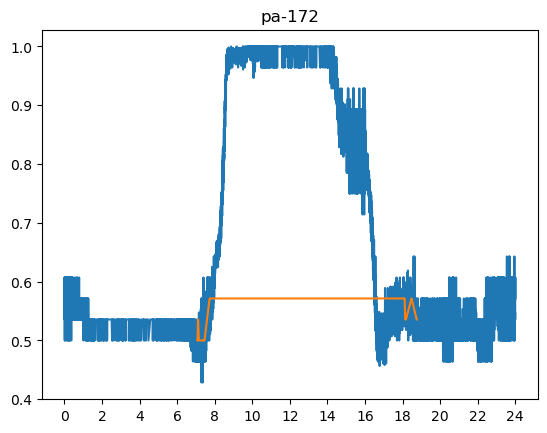

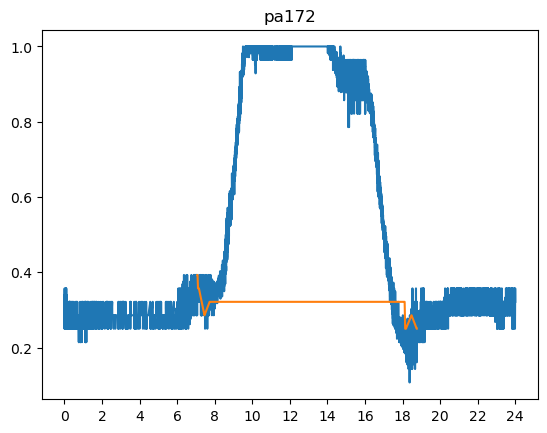

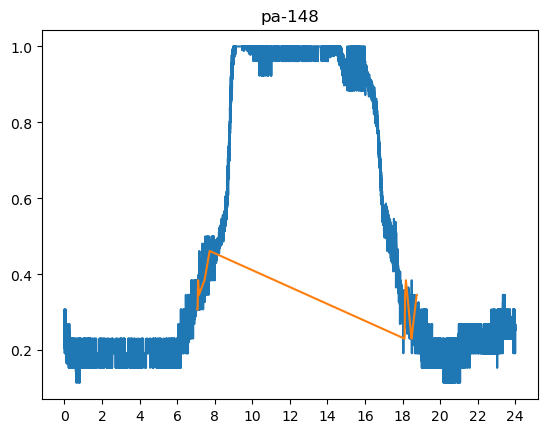

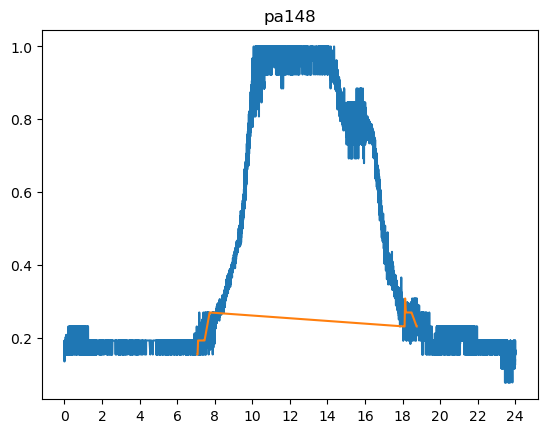

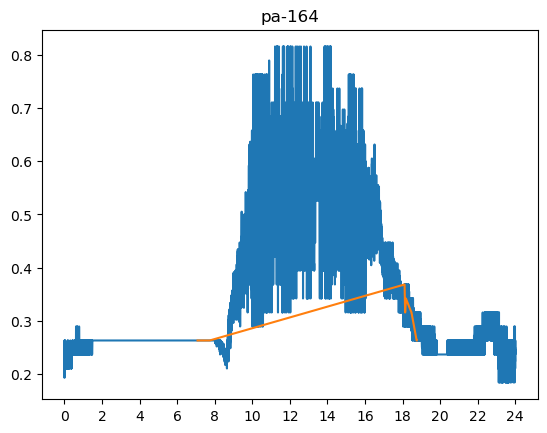

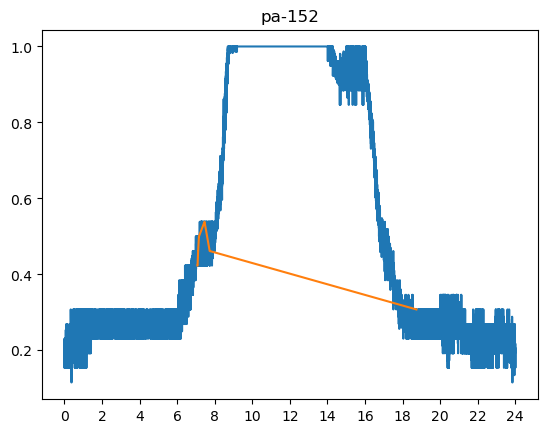

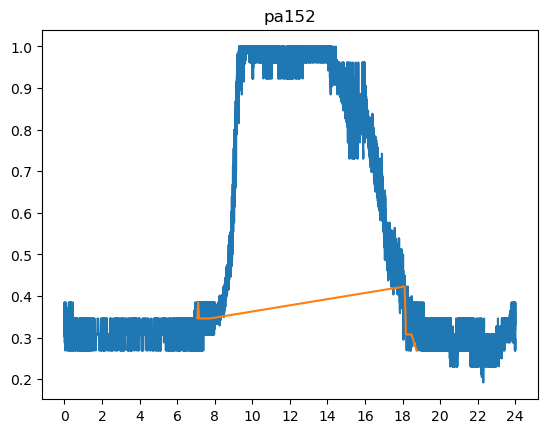

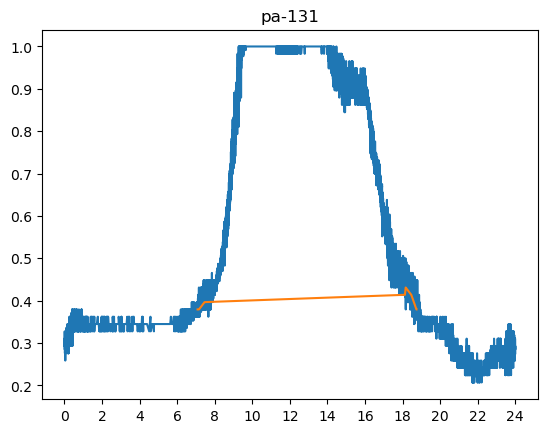

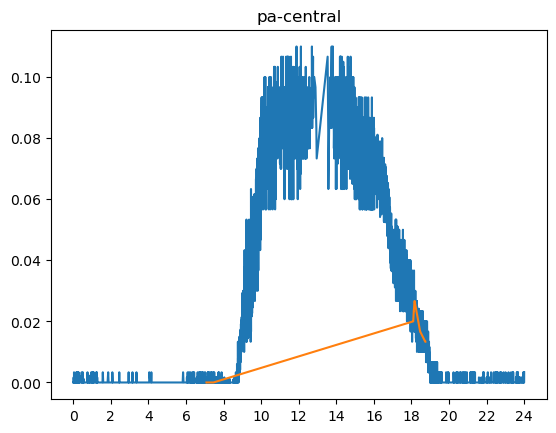

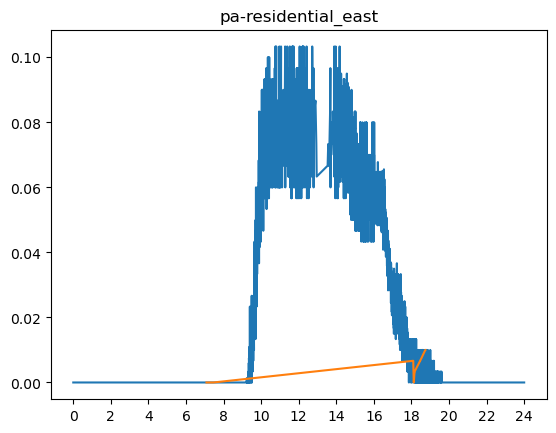

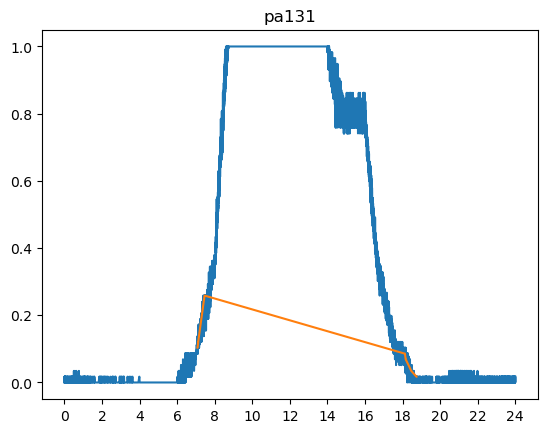

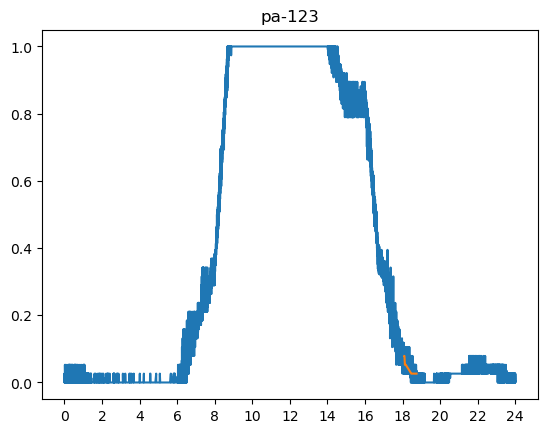

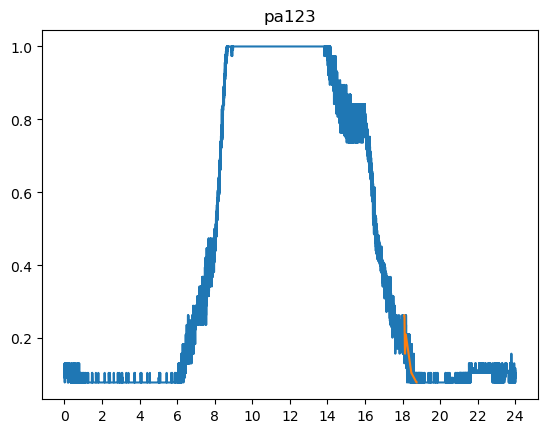

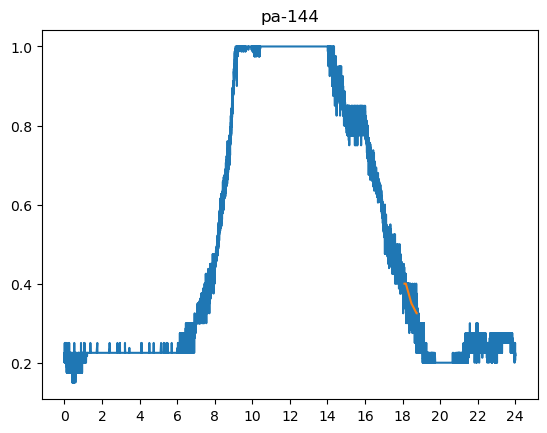

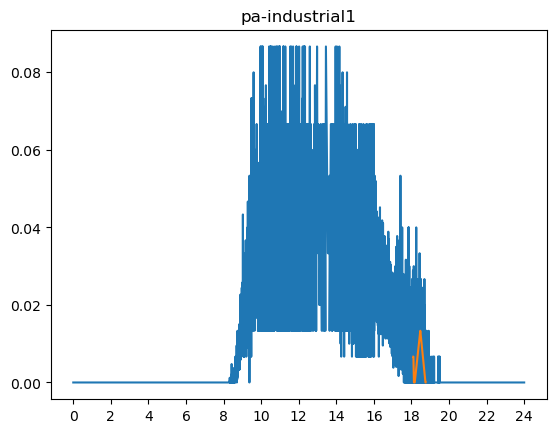

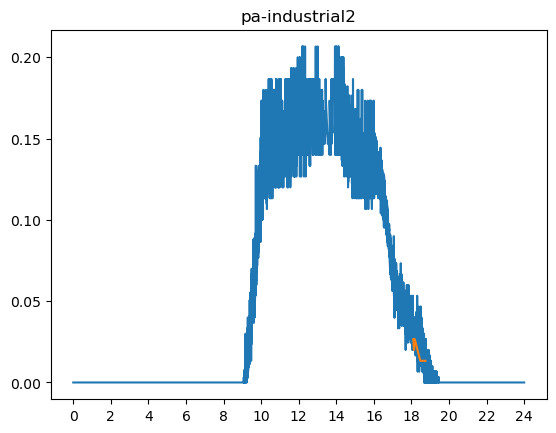

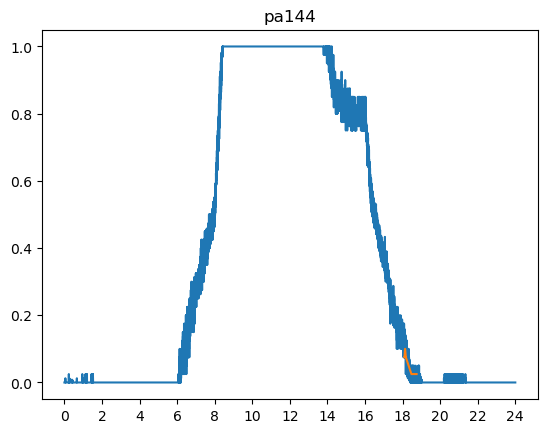

In [49]:
for p in p_veh_by_parking:
    plt.plot(p_data_by_parking[p].index*24, p_data_by_parking[p].values)
    plt.plot(p_veh_by_parking[p].index*24, p_veh_by_parking[p].values)
    plt.title(p)
    plt.xticks(ticks=np.arange(0, 26, 2))
    plt.show()